# Computing Qualifying Offer


In baseball, a team can provide a departing free agent player with a qualifying offer1: a one-year contract whose monetary value is the average of the 125 highest salaries from the past season. The player is free to reject it and sign with any other team, but his new team will have to forfeit a draft pick.

Use the provided dataset to write a program or application that determines the monetary value of the upcoming qualifying offer and displays the amount along with any other relevant information or visualizations to the user. Note that while the URL and general format of the data will be consistent, the data itself can change slightly with each page load, so make sure your code pulls the data each time it is run and expect the final result to change each time.

You should submit a link or file containing your response to the question, including all source code. The link or file should contain a README that contains clear, step-by-step instructions for how to run or access your response.

Submissions will be graded on accuracy, readability, reproducibility, error handling and presentation of the result to the user. Use of online resources such as Stack Overflow is encouraged, but please cite (by including a comment in your code with a link to the resource) any answers used and provide comments on your particular implementation if appropriate. Use of open-source/third-party libraries is encouraged.

Data: https://questionnaire-148920.appspot.com/swe/data.html

Tip: As is often the case, the data sometimes contains corrupted or malformed values. Do your best to handle these and feel free to ignore missing values, but make sure they don’t interfere with the calculation or presentation of the final result.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read table data from the web
html_list = pd.read_html("http://questionnaire-148920.appspot.com/swe/data.html")
df = html_list[0]

From the following we can see we are dealing with 4 columns

Three of them are objects and one is of type int64

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  1208 non-null   object
 1   Salary  1183 non-null   object
 2   Year    1208 non-null   int64 
 3   Level   1208 non-null   object
dtypes: int64(1), object(3)
memory usage: 37.9+ KB


We can also print out the head to get an idea of what our data looks like

In [3]:
df.head()

,Player,Salary,Year,Level
0,"Abreu, Jose","$11,666,667",2016,MLB
1,"Acevedo, Andury","$507,500",2016,MLB
2,"Ackley, Dustin","$3,200,000",2016,MLB
3,"Adames, Cristhian","$507,500",2016,MLB
4,"Adams, Austin","$507,500",2016,MLB


From the dataframe above we notice that `Year` & `Level` will not factor into our equation, and won't provide any useful information

In [4]:
df = df.drop(columns=['Year', 'Level']) # here we will drop the 'Year' & 'Level' columns

Next we are removing the `,` and `$` characters from our salary data so we can cast it as integer data

In [5]:
df['Salary'] = df['Salary'].str.replace(',', '') 
df['Salary'] = df['Salary'].str.replace('$', '')

In [6]:
df['Salary']

0       11666667
1         507500
2        3200000
3         507500
4         507500
          ...   
1203    14000000
1204    18000000
1205    10500000
1206      507500
1207      507500
Name: Salary, Length: 1208, dtype: object

Next we are going to drop NaN values from our data

In [7]:
df_no_nan = df.dropna()

In [8]:
df_no_nan

,Player,Salary
0,"Abreu, Jose",11666667
1,"Acevedo, Andury",507500
2,"Ackley, Dustin",3200000
3,"Adames, Cristhian",507500
4,"Adams, Austin",507500
...,...,...
1203,"Zimmerman, Ryan",14000000
1204,"Zimmermann, Jordan",18000000
1205,"Zobrist, Ben",10500000
1206,"Zunino, Mike",507500


From the following we can see that our row count has been reduced however further inspection of the data reveals rows with strings: `no salary data`
To solve this we are going to remove all non numeric strings from our data.

In [9]:
df_numeric = df_no_nan[df_no_nan['Salary'].str.isnumeric()]

In [10]:
df_numeric_copy = df_numeric.copy() # https://www.dataquest.io/blog/settingwithcopywarning/
df_numeric_copy['Salary'] = df_numeric['Salary'].astype(int) # casting remaining salary data as integers

In [11]:
df_top_125 = df_numeric_copy.sort_values('Salary', ascending=False)[:125] # grabbing the top 125 salaries in descending order

In [12]:
nicks_qualifying_offer = df_top_125['Salary'].mean() # taking the mean of our data

In [13]:
nicks_qualifying_offer = "${:,.2f}".format(nicks_qualifying_offer) # this will be our monetary qualifying offer.
nicks_qualifying_offer

'$16,541,243.89'

I am also assuming my salary for this position would be close to this number as well.

Using the describe method we can display some more relevant information (including the mean) about our data.

In [14]:
df_top_125.describe()

,Salary
count,1.250000e+02
mean,1.654124e+07
std,5.360262e+06
min,1.000000e+07
25%,1.235938e+07
50%,1.500000e+07
75%,2.020000e+07
max,3.457143e+07


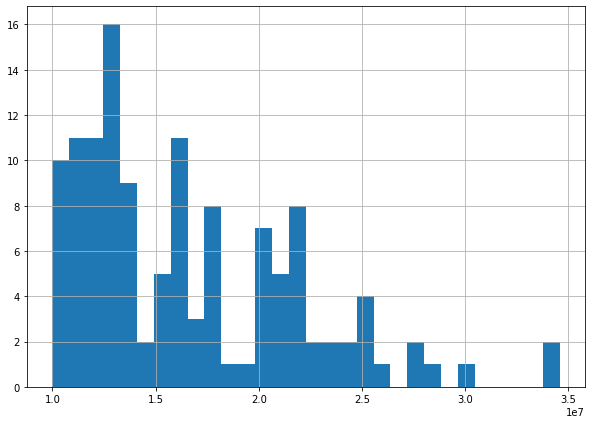

In [15]:
df_top_125['Salary'].hist(bins=30, figsize=(10,7))
plt.show()

The histogram shows us that our data is tail heavy.